In [2]:
#import all libaryes
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
#import all libaryes
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#class 3 activity 11 stu_chinook_database_analysis
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)
climate = Base.classes


In [7]:
#class 3 activity 11 stu_chinook_database_analysis
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# fond in day 3 activity 11 stu_chinook_database_analysis
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
# fond in day 3 activity 11 stu_chinook_database_analysis
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

<AxesSubplot:xlabel='date'>

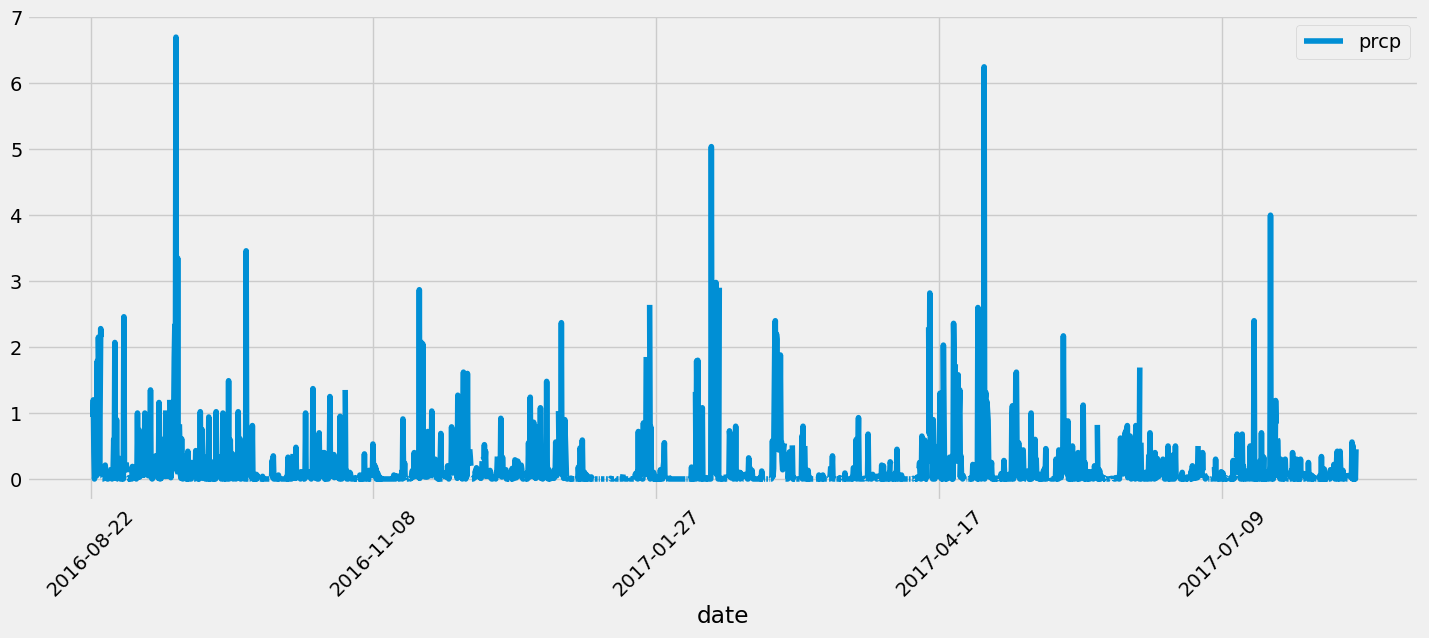

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date
# Calculate the date one year from the last date in data set.
#we know the most restent date is 2017-08-23 and take away 365
year_ago_date= dt.date(2017, 8, 23) - dt.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores
#similar to output 12 in day 3 activite 11-Stu_Chinook_Database_Analysis
#use filter function to selecting only those records from the table where the date is newer than '2016-08-23' 
year_prcp=session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_prcp=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
year_prcp.set_index('date',inplace=True)

# Sort the dataframe by date
#similar to the stu_dow_dates  
year_prcp.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
#similar to the stu_dow_dates where we ploted stocks class 3 stu_Dow_dates  
dates_to_plot = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', 
                 '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

# Plot the data
# year_prcp.plot(kind='bar', legend=False)
# plt.yticks(size=14)
# plt.xticks(fontsize=14)
# plt.legend('')
# plt.xlabel('Date')
# plt.ylabel('Precipitation (in)')

year_prcp.plot(rot=45,figsize=[16,6])

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
#use .describe function
year_prcp.describe()


,prcp
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
#use .count function
#
total_stations=session.query(station).count()
total_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#first we set up the query, then use .count to count the measurement.stations, then use
#group by to group the stations, then lastly we order, use desc to get the greatest first
#similar to out put 12 in day 3 11-Stu_Chinook_Database_Analysis

most_activity=(session.query(measurement.station,func.count(measurement.station))
                         .group_by(measurement.station)
                         .order_by(func.count(measurement.station).desc())
                         .all())
most_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#internet said to use tobs, not sure why or what tobs is 
tobs=[func.min(measurement.tobs), 
             func.max(measurement.tobs), 
             func.avg(measurement.tobs)]
# we want USC00519281 station so we set it == USC00519281 to only get USC00519281
# similar to output 10 in day 3 11-Stu_Chinook_Database_Analysis
most_active_station=(session.query(*tobs)
                       .filter(measurement.station=='USC00519281')
                       .all())
most_active_station

[(54.0, 85.0, 71.66378066378067)]

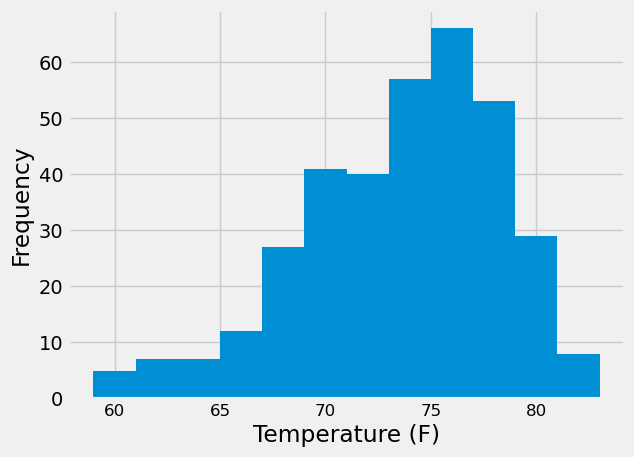

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# we create a seesion find the date newer then the set date, AND then find the station USC00519281
# similar to output 10 in day 3 11-Stu_Chinook_Database_Analysis
year_tobs=(session.query(measurement.date,(measurement.tobs))
                  .filter(func.strftime(measurement.date) > year_ago_date)
                  .filter(measurement.station=='USC00519281')
                  .all())
#set tobs to a dataframe 
tobs_df=pd.DataFrame(year_tobs)
#set the index to date
tobs_df.set_index('date',inplace=True)

#plot histogram of the tobs, this is the newer dates and station USC00519281
plt.hist(tobs_df['tobs'], bins=12)


plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks()

plt.show()

# Close Session

In [18]:
# Close Session
session.close()